In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
from simulation import Simulation
from glob import glob
from matplotlib import pyplot as plt
from matplotlib import ticker

In [2]:
data_files = sorted(glob('../../outputs/numpy_arrays/*'))

In [3]:
len(data_files)

10002

In [4]:
big_list = [np.load(data_files[i]) for i in range(len(data_files))]

In [5]:
big_arr = np.asarray(big_list)
big_arr.shape

(10002, 51, 2, 2, 6)

In [6]:
arr = np.mean(big_arr, axis=0)

In [7]:
arr_year_smoking_state = np.sum(arr,axis=(1,2))
arr_year_smoking_state.shape

(51, 6)

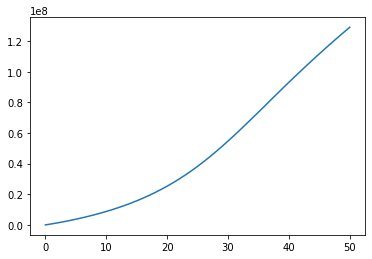

In [8]:
plt.plot(np.arange(arr_year_smoking_state.shape[0]), arr_year_smoking_state[:,5])

In [9]:
arr_year_smoking_state /= 1000000

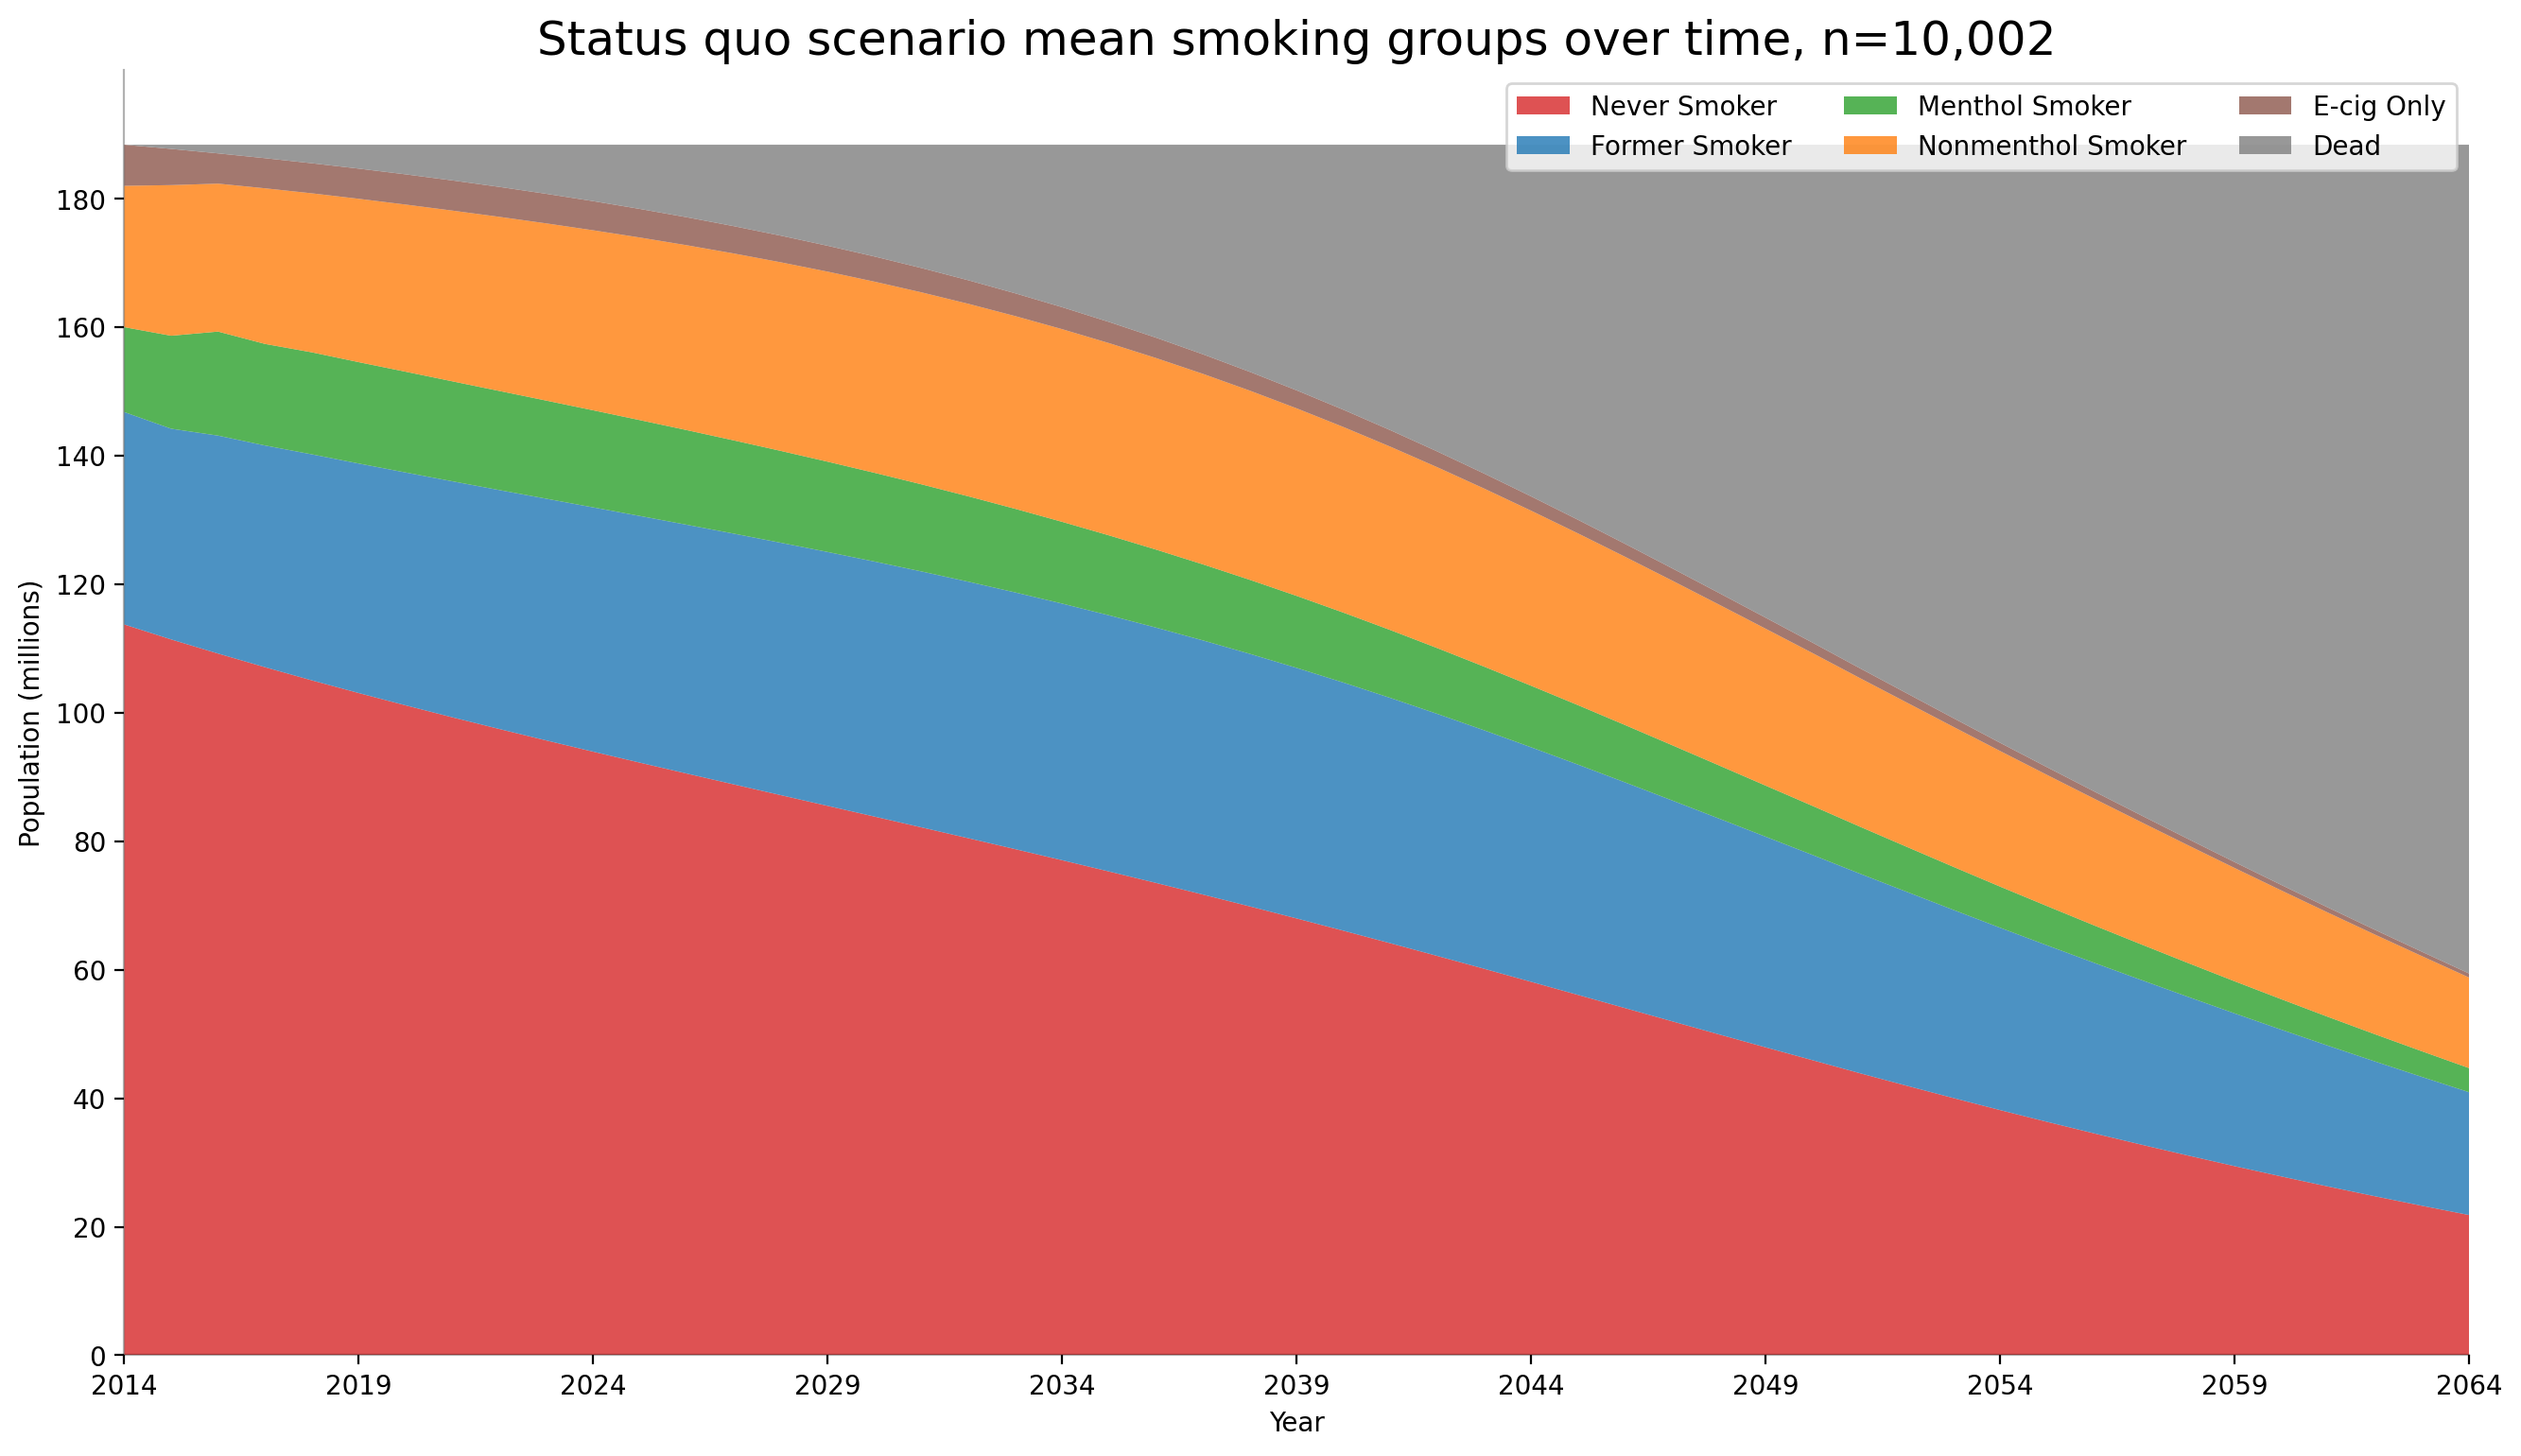

In [10]:
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey',]

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=200)
labels = ["Never Smoker", "Former Smoker", "Menthol Smoker", "Nonmenthol Smoker", "E-cig Only", "Dead"]

x = np.arange(arr_year_smoking_state.shape[0]) + 2014
y = np.vstack([arr_year_smoking_state[:,i] for i in range(arr_year_smoking_state.shape[1])])

ax = plt.gca()
ax.stackplot(x,y,labels=labels, colors=mycolors, alpha=0.8)

ax.set_title('Status quo scenario mean smoking groups over time, n=10,002', fontsize=18)
ax.set(ylim=[0, 2e2])
ax.legend(fontsize=10, ncol=3)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0,2e2,2e1,dtype=np.int64), fontsize=10)
plt.xlim(x[0], x[-1])
plt.xlabel("Year")
plt.ylabel("Population (millions)")

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)


In [11]:
arr_year_smoking_state.shape

(51, 6)

In [12]:
arr_no_dead = arr_year_smoking_state[:,:-1]
arr_no_dead.shape

(51, 5)

In [13]:
arr_no_dead_percents = arr_no_dead / np.sum(arr_no_dead, axis=1).reshape(-1,1) * 100
arr_no_dead_percents[10,:]

array([52.29850894, 21.16828691,  8.40967444, 15.59857299,  2.52495672])

Text(0.5, 1.0, 'Mean proportion of smoking groups in the living population, n=10,002')

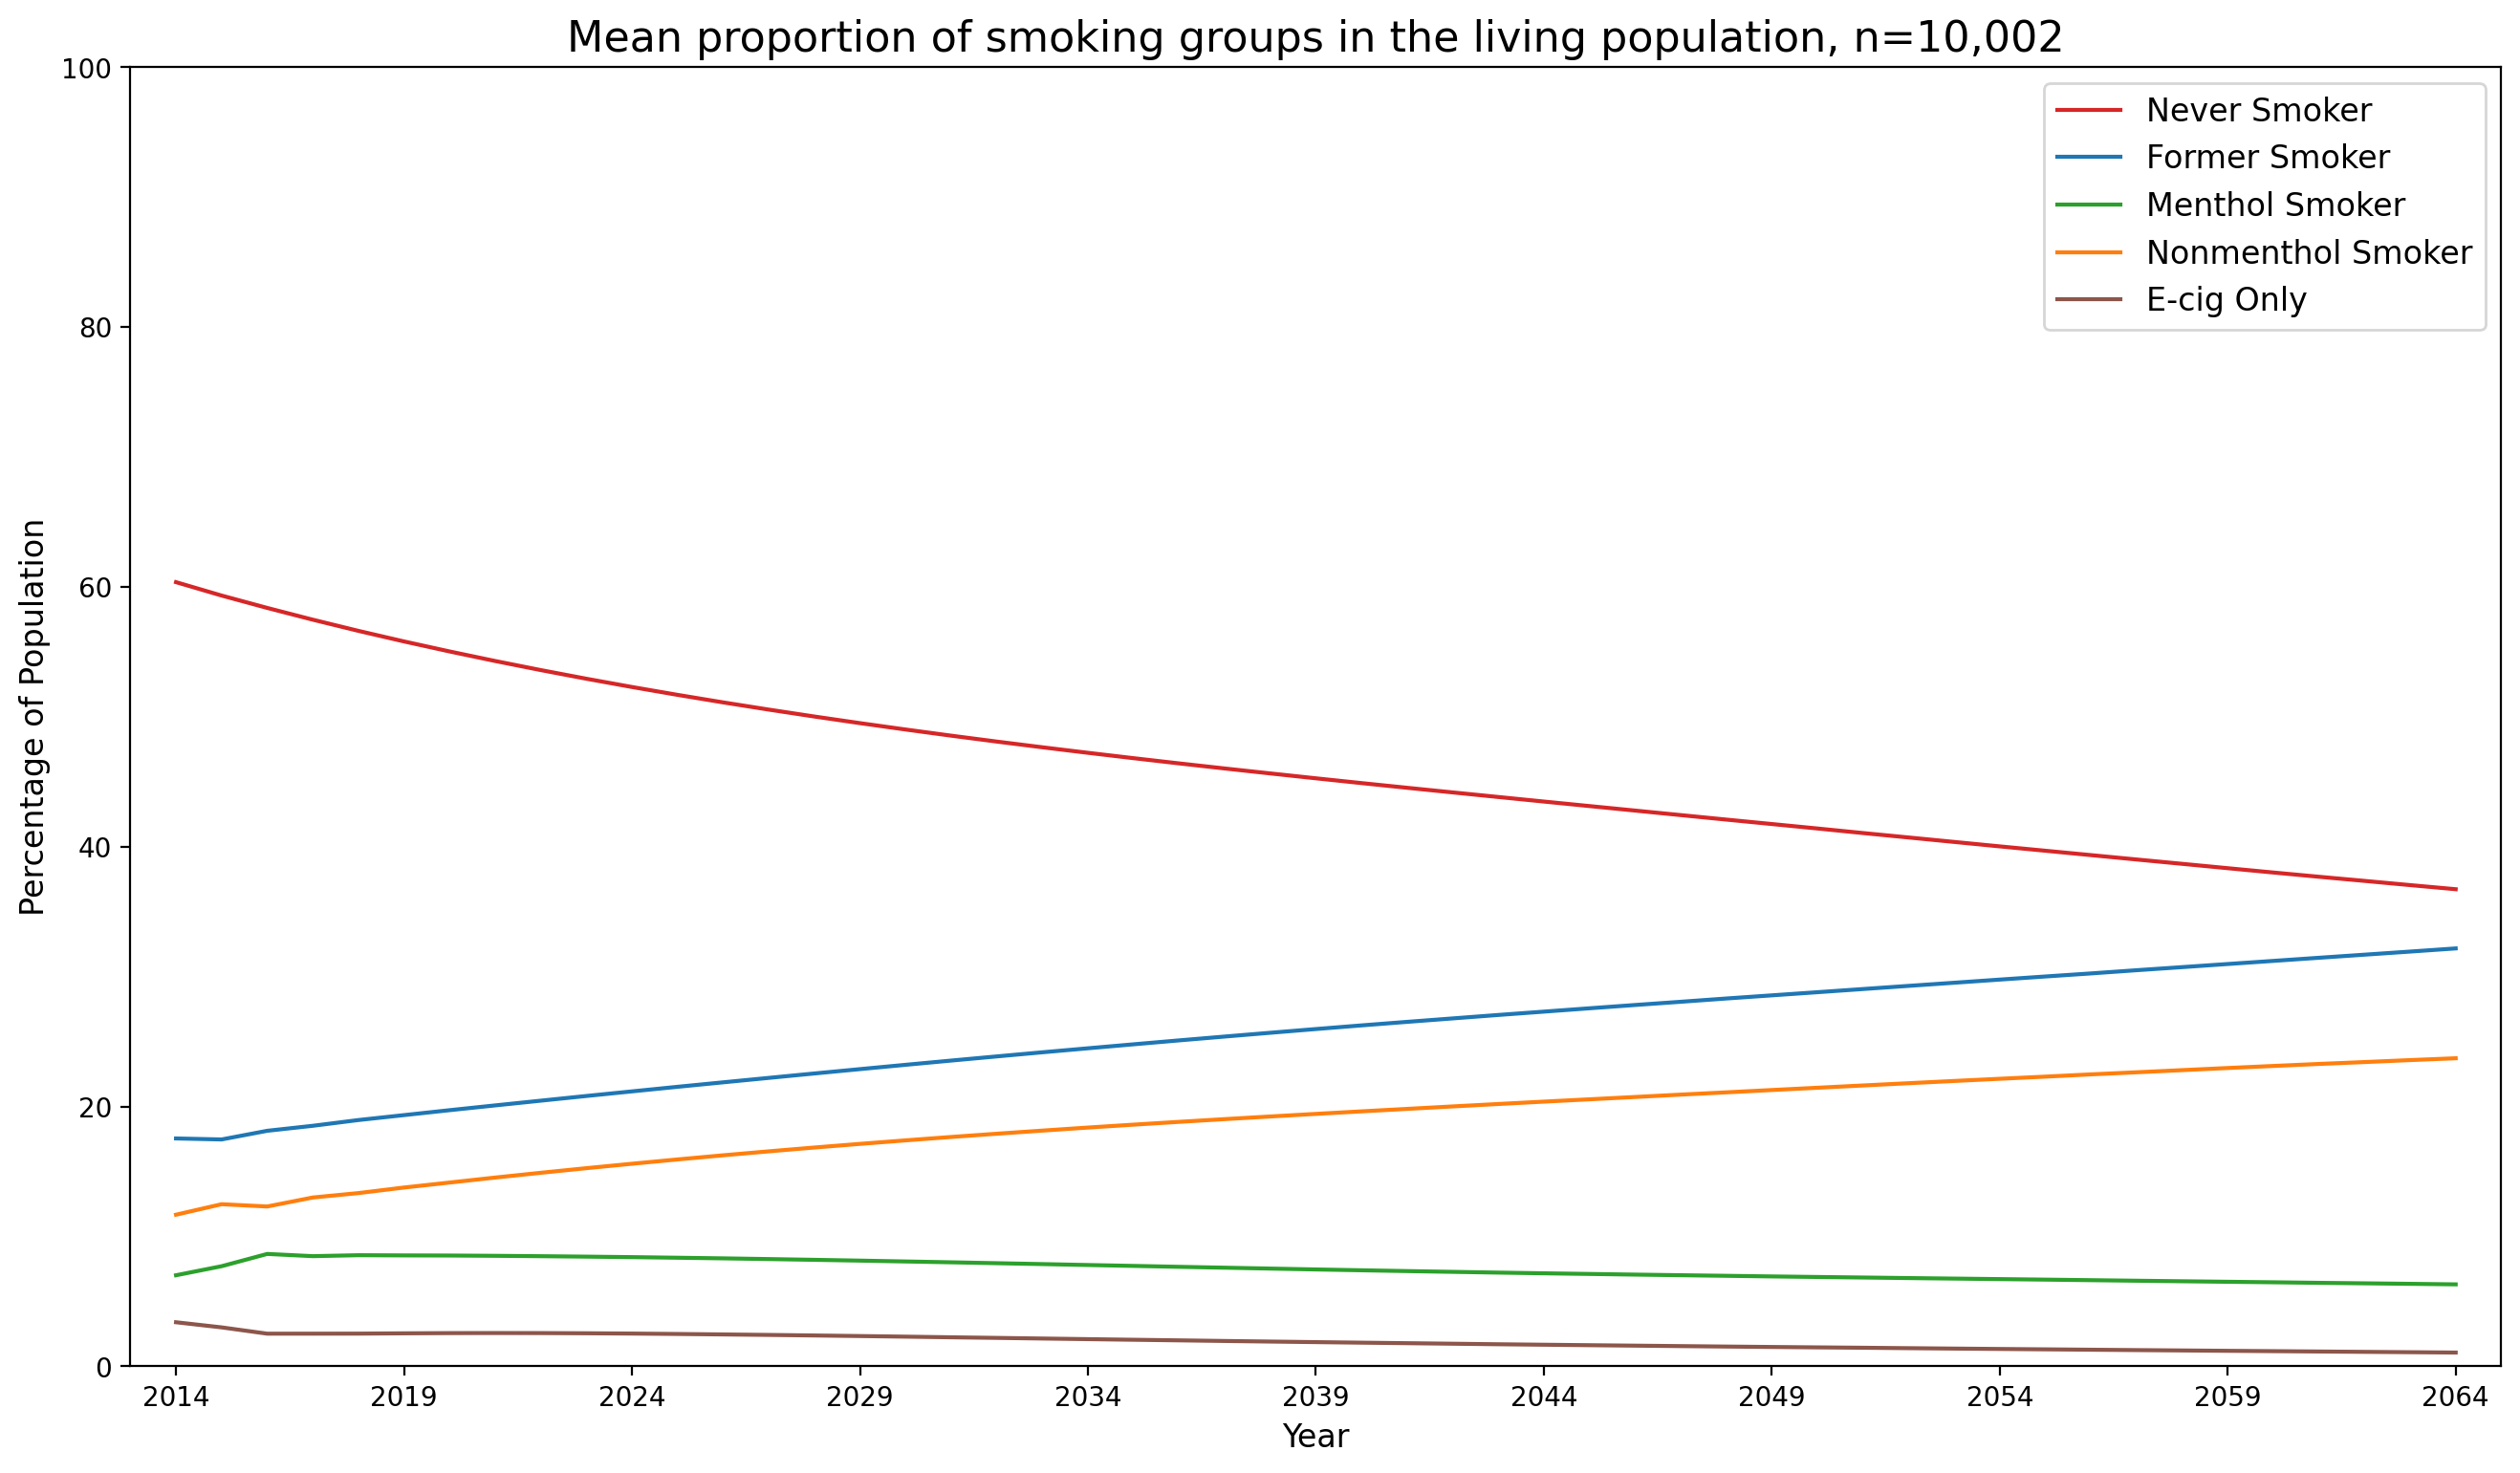

In [14]:
fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=200)
ax.plot(x, arr_no_dead_percents[:,0], mycolors[0],
        x, arr_no_dead_percents[:,1], mycolors[1],
        x, arr_no_dead_percents[:,2], mycolors[2],
        x, arr_no_dead_percents[:,3], mycolors[3],
        x, arr_no_dead_percents[:,4], mycolors[4])

plt.ylim(0,100)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Population", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
ax.legend(labels, fontsize=12, ncol=1)

plt.title("Mean proportion of smoking groups in the living population, n=10,002", fontsize=16)

In [15]:
big_arr.shape
run_year_ss = np.sum(big_arr, axis=(2,3))
run_year_ss.shape

(10002, 51, 6)

In [16]:
run_year_ss_nodead = run_year_ss[:,:,:-1]
run_year_ss_nodead_percents = run_year_ss_nodead / np.sum(run_year_ss_nodead, axis=2)[:,:,np.newaxis] * 100

Text(0.5, 1.0, 'Proportion of smoking groups in the living population, all 10,002 replications')

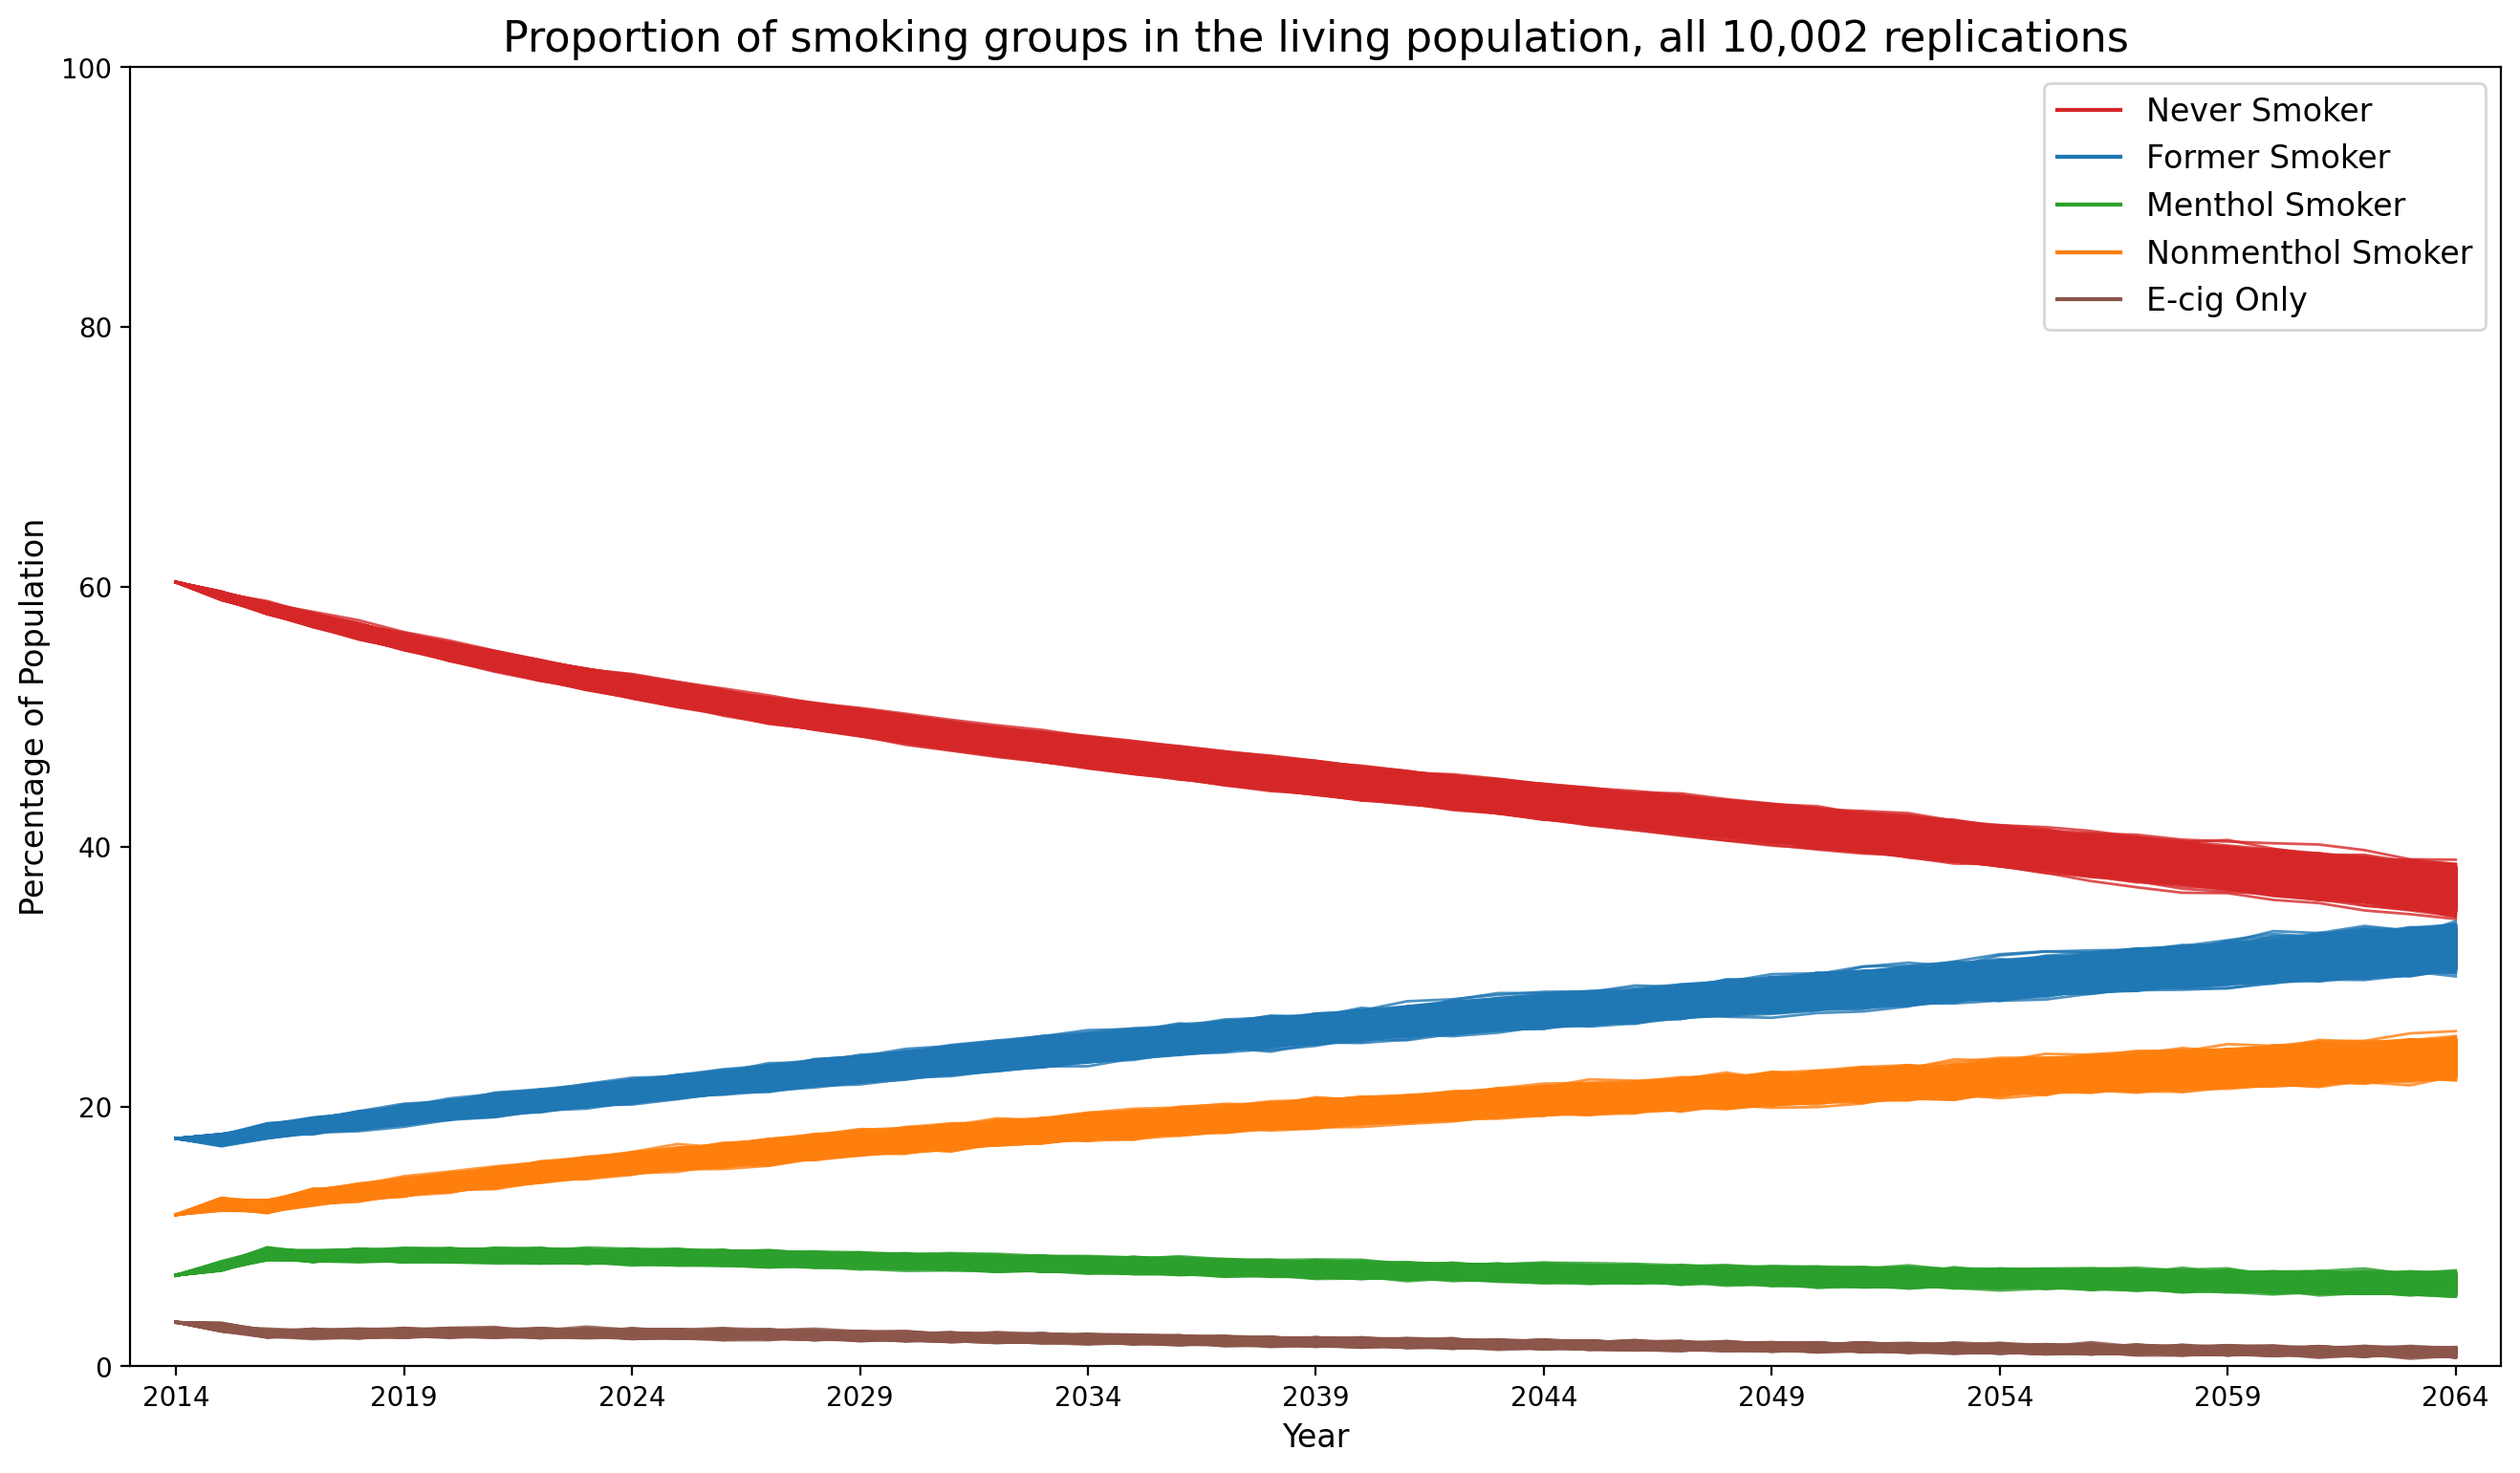

In [19]:
fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=200)

ax.plot(x, arr_no_dead_percents[:,0], mycolors[0],
        x, arr_no_dead_percents[:,1], mycolors[1],
        x, arr_no_dead_percents[:,2], mycolors[2],
        x, arr_no_dead_percents[:,3], mycolors[3],
        x, arr_no_dead_percents[:,4], mycolors[4])

for i in range(run_year_ss_nodead_percents.shape[0]):
    ax.plot(x, run_year_ss_nodead_percents[i,:,0], mycolors[0], linewidth=1.0, alpha=0.8)
    ax.plot(x, run_year_ss_nodead_percents[i,:,1], mycolors[1], linewidth=1.0, alpha=0.8)
    ax.plot(x, run_year_ss_nodead_percents[i,:,2], mycolors[2], linewidth=1.0, alpha=0.8)
    ax.plot(x, run_year_ss_nodead_percents[i,:,3], mycolors[3], linewidth=1.0, alpha=0.8)
    ax.plot(x, run_year_ss_nodead_percents[i,:,4], mycolors[4], linewidth=1.0, alpha=0.8)

plt.ylim(0,100)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Population", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
ax.legend(labels[:5], fontsize=12, ncol=1, )

plt.title("Proportion of smoking groups in the living population, all 10,002 replications", fontsize=16)